# FAKE NEWS DETECTION

# This project of detecting fake news deals with fake and real news. Using sklearn, we build a TfidfVectorizer on our dataset. Then, we initialize a PassiveAggressive Classifier and fit the model. In the end, the accuracy score and the confusion matrix tell us how well our model fares.


In [29]:
#Importing the libraries

import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt

In [4]:
#To get the dataframe

df=pd.read_csv('news.csv')

df.shape
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [5]:
#To get the labels

labels=df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [6]:
#Splitting the dataset

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df['text'],labels,test_size=0.2,random_state=7)

In [25]:
#Initializing the TfidfVectorizer

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(stop_words='english',max_df=0.7)

#Fit and transform training dataset
tfidf_train=tfidf.fit_transform(x_train)

#Transform test dataset
tfidf_test=tfidf.transform(x_test)

In [26]:
#Initialize a passiveAggressiveClassifier

from sklearn.linear_model import PassiveAggressiveClassifier

pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=50, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

In [27]:
#Predicting on the dataset and calculating accuracy

from sklearn.metrics import accuracy_score, confusion_matrix

y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.9%


In [28]:
#Building the confusion matrix

confusion_matrix(y_test,y_pred,labels=['FAKE','REAL'])

array([[591,  47],
       [ 43, 586]], dtype=int64)

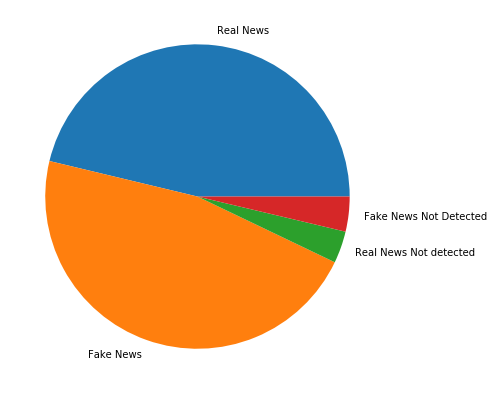

In [32]:
fig=plt.figure(figsize=(10,7))
news=['Real News','Fake News','Real News Not detected','Fake News Not Detected']
data=[586,591,43,47]
plt.pie(data,labels=news)
plt.show()